In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Reading the dataset

In [77]:
def load_data(train_path, test_path):
   

    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    print("number of training examples = " + str(train_data.shape[0]))
    print("number of test examples = " + str(test_data.shape[0]))
    print("train shape: " + str(train_data.shape))
    print("test shape: " + str(test_data.shape))

    return train_data, test_data

In [78]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv("/content/test.csv")

In [79]:
load_data('/content/train.csv', "/content/test.csv")

number of training examples = 891
number of test examples = 418
train shape: (891, 12)
test shape: (418, 11)


(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Cleaning Dataset

In [82]:
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] =='female',  'Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data["Embarked"] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] =2

In [114]:
def write_prediction(prediction, name):
    PassengerId = np.array(test['PassengerId']).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ['Survived'])
    solution.to_csv(name, index_label = ['PassengerId'])

In [84]:
clean_data(train)
clean_data(test)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [86]:
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

#Feature Engineering

In [87]:
all_data=[train,test]
all_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris   0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
 2                               Heikkinen, Miss. Laina   1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
 4                             Allen, Mr. William Henry   0  35.0      0   
 ..                                                 ...  ..   ...    ...  

In [88]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


In [89]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [90]:
for dataset in all_data:
    dataset['Age_Range'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [91]:
for dataset in all_data:
    dataset['Fare_Range'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [92]:
all_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris   0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1   
 2                               Heikkinen, Miss. Laina   1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1   
 4                             Allen, Mr. William Henry   0  35.0      0   
 ..                                                 ...  ..   ...    ...  

In [93]:
traindf=train
testdf=test

In [94]:
all_dat=[traindf,testdf]

In [95]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [96]:
all_dat

[     Survived  Pclass Sex  SibSp  Parch Embarked  FamilySize Title Age_Range  \
 0           0       3   0      1      0        0           2    Mr     Adult   
 1           1       1   1      1      0        1           2   Mrs     Adult   
 2           1       3   1      0      0        0           1  Miss     Adult   
 3           1       1   1      1      0        0           2   Mrs     Adult   
 4           0       3   0      0      0        0           1    Mr     Adult   
 ..        ...     ...  ..    ...    ...      ...         ...   ...       ...   
 886         0       2   0      0      0        0           1  Rare     Adult   
 887         1       1   1      0      0        0           1  Miss   Teenage   
 888         0       3   1      1      2        0           4  Miss     Adult   
 889         1       1   0      0      0        1           1    Mr     Adult   
 890         0       3   0      0      0        2           1    Mr     Adult   
 
        Fare_Range  
 0   

In [97]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [98]:
traindf.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
1,1,1,1,0,2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,0,2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0,3,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [99]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [100]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,893,3,1,0,2,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,894,2,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,895,3,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,896,3,1,1,3,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


#HeatMap

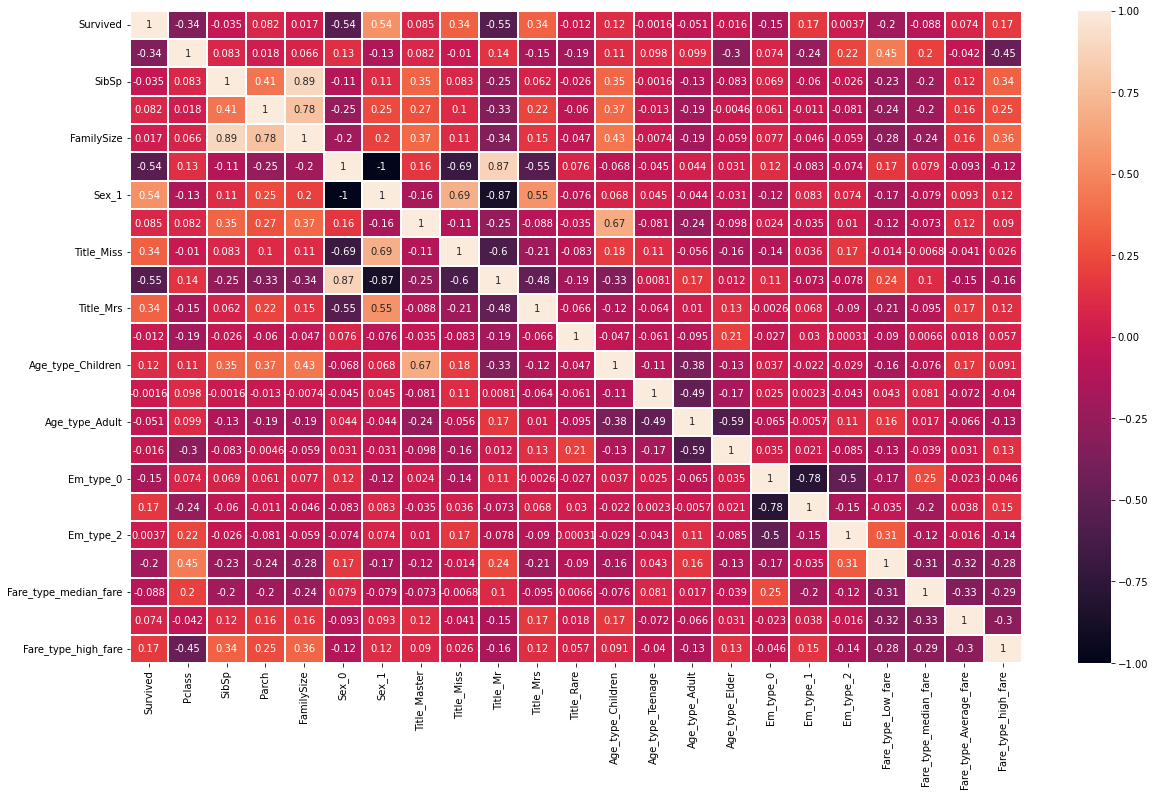

In [101]:
sns.heatmap(traindf.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

#Model Implementation

In [102]:
target = traindf['Survived'].values
features = traindf[['Pclass','SibSp','Parch','FamilySize','Sex_0','Sex_1','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','Age_type_Children','Age_type_Teenage','Age_type_Adult','Age_type_Elder','Em_type_0','Em_type_1','Em_type_2','Fare_type_Low_fare','Fare_type_median_fare','Fare_type_Average_fare','Fare_type_high_fare']].values

In [103]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
#Deep Neural Network Initialization
classifier = Sequential()
#Input Layer of the Deep Neural Network
classifier.add(Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform"))
#Hidden Layers of the Deep Neural Network with Dropout
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
#Output Layer of the Deep Neural Network
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
#Optimizers
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                253       
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dropout_4 (Dropout)         (None, 11)                0         
                                                                 
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dropout_5 (Dropout)         (None, 11)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 60        
                                                                 
 dense_14 (Dense)            (None, 1)                

In [104]:
history=classifier.fit(features, target, batch_size = 10, epochs = 100,validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/100
81/81 [==============================] - 2s 5ms/step - loss: 0.6902 - accuracy: 0.6117 - val_loss: 0.6862 - val_accuracy: 0.6222
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6155 - val_loss: 0.6794 - val_accuracy: 0.6222
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6155 - val_loss: 0.6737 - val_accuracy: 0.6222
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6155 - val_loss: 0.6691 - val_accuracy: 0.6222
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6155 - val_loss: 0.6671 - val_accuracy: 0.6222
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6155 - val_loss: 0.6654 - val_accuracy: 0.6222
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6155 - val_loss: 0.6647 - val_accuracy: 0.6222
Epoch 8/100
8

In [105]:
td=testdf
drop_column = ['PassengerId']
testdf.drop(drop_column, axis=1, inplace = True)
testdf.head()

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,3,1,0,2,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2,2,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,3,1,1,3,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [106]:
Y_pred = classifier.predict(testdf)

14/14 [==============================] - 0s 2ms/step


In [107]:
Y_pred=Y_pred.round()
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [108]:
testdf

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,3,1,0,2,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2,2,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,3,1,1,3,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
414,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
415,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
416,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [115]:
write_prediction(Y_pred, "gender_submission.csv")

In [116]:
df1=pd.read_csv("gender_submission.csv")
df1

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0
